This Jupyter Notebook produces a dataset from the Chronicling America Title Essays. It introduces readers to the concept of the [Library of Congress API](https://www.loc.gov/apis/), the various facets that it queries, and the titles essays themselves. It is meant to act as a stand-in workshop that introduces a few programming elements while producing the neccessay code to bulk download and package the Chronicling America title essays. If you would like to jump ahead and see the packaged title essays themselves, they are included in this repository as a comma-separated values (CSV) file titled lc_output.csv. That file is updated periodically and was last created on October 13, 2022. 

To best understand this Jupyter Notebook, read it in conjunction with the following Jupyter [notebook](https://github.com/LibraryOfCongress/data-exploration/blob/master/loc.gov%20JSON%20API/Accessing%20images%20for%20analysis.ipynb). While this notebook provides the reader with the ability to produce datasets, the following notebook hopes to contextualize these data by providing code-snippets for possible project starting points. 

As a whole, this notebook should be read as a hands-on tutorial for downloading data, selecting metadata fields, and writing that data to CSVs. 

Please note that not all newspapers have title essays and that title essays are added on a rolling basis. This data is up to date as of October 13, 2022. 

---------

Although they produce different datasets, other notebooks within this [repository](https://github.com/LibraryOfCongress/data-exploration/blob/master/loc.gov%20JSON%20API/Accessing%20images%20for%20analysis.ipynb) function in a similar way to this one. Please use them for reference and as a further guide.


----

## Title Essays

In addition to standardized description based on existing cataloging records, newspapers that have been selected for digitization by the [National Digital Newspaper Program](https://www.loc.gov/ndnp/) (NDNP) state partners are accompanied by supplementary description (also known as “title essays”). These essays contain basic information about the paper, including:

- place of publication (if not already evident);
- dates and schedule of publication (e.g., weekly, daily, morning, or evening);
- geographic area covered and circulation statistics;
- political, religious, or other affiliation and reason for publication;
- specialized audiences;
- physical attributes;
- changes in name, format, and ownership.


In addition, title essays usually discuss:

- editors, publishers, or reporters of note;
- significant events covered by the paper in the relevant time period (a short quote from the paper itself can help provide a sense of the paper's voice);
- special features such as poetry or fiction, women’s section, sports, society, etc.;
- relationships with other area newspapers;
- innovations or advances in newspaper production and technology.

These brief essays appear as part of the descriptive title information, NDNP state partners research and write these essays specifically for Chronicling America. [The Division of Preservation and Access](https://www.neh.gov/divisions/preservation) of the [National Endowment of the Humanities](https://www.neh.gov) review the essays as part of the NDNP partnership. The essays are intended as starting points for additional research and understanding of the historical role of each newspaper.

Newspapers that have title essays are identified in the [All Digitized Newspapers list](https://chroniclingamerica.loc.gov/newspapers/) where the “More Info” value is “Yes.” The content of the essays can be searched through the U.S. Newspaper Directory search form, using the “keyword” search. Results will link to records that include those keywords.

Historical newspapers reflect the language and attitudes of their time, and may contain biased, offensive, and outdated words and images that may be hurtful to particular groups or people. In the title essays, writers strive to avoid this language in supplemental text and only include these terms where it is deemed necessary to understanding the context in which the newspaper was produced. Title essay authors only use such language in the title of the newspaper, the name of an affiliated organization, part of the self-identification of a person or group, or if we are directly quoting from the newspaper. Even then, the title essays only include these terms if the author deems it necessary to understanding the context in which the newspaper was produced.


----------------------------

This code produces a static dataset from Chronicling America's Title Essays. It also includes elements of those title's MARC records. See below for specific details of the metadata captured when the code is run.

Finally, because this code is written for pedagogic purposes, it is highly commented. Feel free to fork this code, or take elements for your project.

------

## Part 1

-------

The code elements within this notebook can be run by clicking the Run button above. 

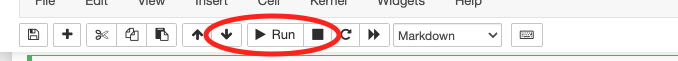

Feel free to edit the code within these boxes, save a copy, and reuse it for your purposes. 

First, as with most Python notebooks, we will import the necessary Python libraries. 

Included below is a list of the libraries we are importing along with a link to further documentation.

- [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/)
- [csv](https://docs.python.org/3/library/csv.html)
- [numpy](https://numpy.org/doc/stable/)
- [pandas](https://pandas.pydata.org/docs/)
- [random](https://docs.python.org/3/library/random.html)
- [requests](https://requests.readthedocs.io/en/latest/)
- [time](https://docs.python.org/3/library/time.html)



In [1]:
# import necessary libraries.

from bs4 import BeautifulSoup
import csv
import numpy as np
import pandas as pd
import random
import requests
import time

Let's first get an idea of the newspapers available in Chronicling America. 

In order to do this, we'll go to the Library of Congress's website for the [Directory of US Newspapers and filter by Chroncling America](https://www.loc.gov/collections/directory-of-us-newspapers-in-american-libraries/?all=true&c=50&fa=partof_collection:chronicling+america&sp=1). As of October 13, 2022, this search returns 3,683 full text newspaper titles.

We'll use these URLs and the LCCNs from these URLS to construct our dataset.

However, first we need to "crawl" this website to save these urls. Web crawling is a form of data mining that anticipates programatically going through web pages and vacuuming up the data on them. Others have written more comprehensive guides and tools do [exist](https://programminghistorian.org/en/lessons/fetch-and-parse-data-with-openrefine). 

The following two blocks of code generate a list of urls. Like most Jupyter notebooks, this code is broken down into manageable sections that can be run independently of each other. 
1. The first block of code creates a list of pages from the Directory of US Newspapers that contain Chronicling America urls.
2. The second block, iterates through those pages with Chronicling America urls and saves those urls to a new list. Our code pauses for two seconds, or "sleeps," in between each page so as not to overload the Library of Congress's servers. The end result is a list of 3683 urls. 

In [2]:
total_url = 'https://www.loc.gov/collections/directory-of-us-newspapers-in-american-libraries/?all=true&c=1000&fa=partof_collection:chronicling+america&sp={}'

pages = list(map(lambda x: total_url.format(x), 
                 range(1, 5)))

Use beautiful soup to grab urls for lccns:

In [3]:
links = []
for page in pages:
    response = requests.get(page)
    time.sleep(2)
    soup = BeautifulSoup(response.text, "html.parser")
    for title in soup.find_all("span", "item-description-title"):
        link = title.find("a")["href"]
        links.append(link)

Let's list the first 10 links to make sure everything worked correctly:

In [4]:
links[:10]

['https://www.loc.gov/item/sn85026945/',
 'https://www.loc.gov/item/sn93067670/',
 'https://www.loc.gov/item/sn93067668/',
 'https://www.loc.gov/item/sn84026853/',
 'https://www.loc.gov/item/sn85042527/',
 'https://www.loc.gov/item/sn88064057/',
 'https://www.loc.gov/item/sn83045004/',
 'https://www.loc.gov/item/sn83045003/',
 'https://www.loc.gov/item/sn98069055/',
 'https://www.loc.gov/item/sn83016734/']

And that those link out to a single column csv for analysis and storage.

In [5]:
header = ["lccn"]
with open("lc_output.csv", "w") as f:
    write = csv.writer(f) 
    write.writerow(header) 
    for link in links:
        write.writerow([link])

------------

## Part 2

---------

Next, we will take that list of URLs and create a small script to pull down data from the Library API. I originally wrote it as a parallelized script that downloaded the code in about 45 minutes. Unfortunately, it kept overloading the Library of Congress API. I re-wrote it so that it instead uses a handful of 'user-agents' to download the data. This "slow" method takes about three hours. 

In [6]:
df = pd.read_csv("lc_output.csv")  
    
df.head(10) 

,lccn
0,https://www.loc.gov/item/sn85026945/
1,https://www.loc.gov/item/sn93067670/
2,https://www.loc.gov/item/sn93067668/
3,https://www.loc.gov/item/sn84026853/
4,https://www.loc.gov/item/sn85042527/
5,https://www.loc.gov/item/sn88064057/
6,https://www.loc.gov/item/sn83045004/
7,https://www.loc.gov/item/sn83045003/
8,https://www.loc.gov/item/sn98069055/
9,https://www.loc.gov/item/sn83016734/


In [7]:
lccns = df.lccn
lccns.head()

0    https://www.loc.gov/item/sn85026945/
1    https://www.loc.gov/item/sn93067670/
2    https://www.loc.gov/item/sn93067668/
3    https://www.loc.gov/item/sn84026853/
4    https://www.loc.gov/item/sn85042527/
Name: lccn, dtype: object

In [8]:
urls = []

for lccn in lccns:
    urls.append(f"{lccn}?fo=json")

In [9]:
len(urls)

3683

In [1]:
# N.B. As of October 13, 2022, ther are only about ~2000 unique essays. The rest are variations and duplicates. 

In [11]:
with open('user_agents.txt', 'r') as f:
    user_agents_list = [x.strip() for x in f.readlines()]

user_agents_list[:2]

['Mozilla/5.0 (Linux; U; Android 4.0.3; ko-kr; LG-L160L Build/IML74K) AppleWebkit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30',
 'Mozilla/5.0 (Linux; U; Android 4.0.3; de-ch; HTC Sensation Build/IML74K) AppleWebKit/534.30 (KHTML, like Gecko) Version/4.0 Mobile Safari/534.30']

In [12]:
val = random.randint(0, len(user_agents_list)-1)
# headers = {'User-agent' : user_agents_list[val]}
val

0

In [13]:
# Custom headers are often used to avoid timeouts. This function sets up a custom header. 
# While we do not use it in our code, we've kept in place for documentation purposes.
def rando_headers():
    val = random.randint(0, len(user_agents_list)-1)
    headers = {'User-agent' : user_agents_list[val]}
#     print(headers)

First, we'll get one record to determine both the structure of the json and figure out which aspects of the record we want to download. We do so below.


This JSON data is an adaption of the bibliographic metadata created for the Library of Congress's [CONSER Program](https://www.loc.gov/aba/pcc/conser/index.html). The CONSER metadata is standard for all Chronicling America and Library of Congress serials. The [CONSER Documentation and Updates](https://www.loc.gov/aba/pcc/conser/more-documentation.html) page, specifically the section on newspapers, contains more information about the application of CONSER to serials.

Additionally, the following page contains information for mapping [CONSER Standard Record (CSR) to Metadata Application Profiles (MAPs)](https://www.loc.gov/aba/pcc/conser/issues/CSR.html). This includes information about mapping CONSER to MARC21.

Finally, please find more information about the metadata contained in the CONSER Standard Record [here](https://www.loc.gov/aba/pcc/conser/documents/CONSER-RDA-CSR.pdf). 

In [14]:
# get one record to see fields.
# compare extract_timestamp 
r = requests.get("https://www.loc.gov/item/sn85059812/?fo=json")
r.json()

{'articles_and_essays': None,
 'cite_this': {'apa': '(1901, January 1)  <cite>The Advocate Charleston, W. Va. -1913</cite>. Retrieved from the Library of Congress, https://www.loc.gov/item/sn85059812/.',
  'chicago': '<cite>The Advocate Charleston, W. Va. -1913</cite>. (Charleston, WV), Jan. 1 1901. https://www.loc.gov/item/sn85059812/.',
  'mla': '<cite>The Advocate Charleston, W. Va. -1913</cite>. (Charleston, WV) 1 Jan. 1901. Retrieved from the Library of Congress, www.loc.gov/item/sn85059812/.'},
 'holdings_url': 'https://www.loc.gov/item/sn85059812/?st=holdings',
 'item': {'_version_': 1746559459402973184,
  'access_restricted': False,
  'aka': ['http://lccn.loc.gov/sn85059812',
   'http://www.loc.gov/item/sn85059812/'],
  'batch': ['wvu_lincoln_ver01'],
  'call_number': ['ISSN RECORD'],
  'campaigns': [],
  'composite_location': ['0/united states/',
   '1/united states/west virginia/',
   '2/united states/west virginia/kanawha/',
   '3/united states/west virginia/kanawha/charlest

Once we determine which fields we want to use, we next create a function that downloads selected MARC fields along with the title essays and save them to a Python dictionary. 

This section needs to be fleshed out a bit more with examples for how to append more / less information from MARC records. It would also be useful to limit by particular subject tags i.e. `African American`

The following code function downloads all data. We filter based on marc record fields i.e. `created_published` or `date.` These can be further limited based on criteria (see the commented out code below for examples). Feel free to experiment or reach out if you need assistance delimiting data.

In [15]:
def parse_json(url):
    datum = {}
    response = requests.get(url, timeout=15)
    
    json_data = response.json() if response and response.status_code == 200 else None
    
    if json_data and 'item' in json_data:
        
        datum['created_published'] = json_data.get('item').get('created_published', 'none')
        # datum['date'] = json_data.get('item').get('date', '1861')
        datum['date'] = json_data.get('item').get('date', 'none')
        datum['dates_of_publication'] = json_data.get('item').get('dates_of_publication', 'none')
        datum['description'] = json_data.get('item').get('description', 'none')
        datum['essay'] = json_data.get('item').get('essay', 'none')
        datum['essay_contributor'] = json_data.get('item').get('essay_contributor', 'none')
        datum['language'] = json_data.get('item').get('language', 'none')
        datum['latlong'] = json_data.get('item').get('latlong', 'none')
        datum['location'] = json_data.get('item').get('location', 'none')
        datum['raw_lccn'] = json_data.get('item').get('raw_lccn', 'none')
        datum['subjects'] = json_data.get('item').get('item').get('subjects', 'none')
        # datum['subjects'] = json_data.get('item').get('subjects', 'African Americans')
        datum['title'] = json_data.get('item').get('item').get('title', 'none')
        datum['url'] = json_data.get('item').get('url', 'none')
        
    time.sleep(0.5)
    
    return datum

### Main Loop

Now that our function is defined and our fields are selected, we can run our code below. We append our data into a large list so that we can save it to a csv later.

We give our script a timeout of 15 seconds and write the links that don't download to a file called `errors.txt`.

Note that the code below takes about 3 hours to run. 

In [16]:
%%time

datas = []

for url in urls:
    try:
        datas.append(parse_json(url))
    except Exception as e:
        print(e)
        
        with open('errors.txt', 'a') as f:
            f.write(f'\n{url}')
        continue
    time.sleep(0.7)

CPU times: user 2min 12s, sys: 13.2 s, total: 2min 26s
Wall time: 2h 44min 43s


Finally we write out the data to a csv. If you decide to download different records, you'll need to change the `field_names`

In [17]:
with open("chron_am_essays.csv", "w") as f:
        field_names = ['created_published', 'date', 'dates_of_publication', 'description', 'essay', 'essay_contributor',
                          'language', 'latlong', 'location', 'raw_lccn', 'subjects', 'title', 'url']
        writer = csv.DictWriter(f, field_names)
        writer.writerow({x: x for x in field_names})
        for row in datas:
            writer.writerow(row)

In [18]:
raw = pd.read_csv("chron_am_essays.csv")  
    
raw

,created_published,date,dates_of_publication,description,essay,essay_contributor,language,latlong,location,raw_lccn,subjects,title,url
0,"['Abbeville, S.C. : Charles H. Allen, 1847-186...",1847,1847-1869,"['Weekly Vol. 4, no. 1 (Mar. 3, 1847)-v. 25, n...","<p>\n\tFor nearly a century, the <em>Abbeville...","['University of South Carolina; Columbia, SC']",['english'],"[34.17895, -82.38025]","['united states', 'south carolina', 'abbeville...",sn 85026945,"['Abbeville (S.C.)--Newspapers', 'Abbeville Co...",The Abbeville banner.,https://www.loc.gov/item/sn85026945/
1,"['Abbeville, S.C. : Hugh Wilson']",1865,1865-1865,['Weekly Began in July 1865. Ceased with Aug. ...,<p>\n\tThe short-lived weekly <em>Abbeville Bu...,"['University of South Carolina; Columbia, SC']",['english'],"[34.17895, -82.38025]","['united states', 'abbeville county', 'abbevil...",sn 93067670,"['Abbeville County (S.C.)--Newspapers', 'South...",The Abbeville bulletin.,https://www.loc.gov/item/sn93067670/
2,"['Abbeville, S.C. : Bonham and Perrin']",1884,1884-1887,"['Weekly Began Oct. 1, 1884; ceased in 1887. C...",<p>\n\tThe <em>Abbeville Messenger</em> (1884-...,"['University of South Carolina; Columbia, SC']",['english'],"[34.17895, -82.38025]","['united states', 'abbeville county', 'abbevil...",sn 93067668,"['Abbeville County (S.C.)--Newspapers', 'South...",The Abbeville messenger.,https://www.loc.gov/item/sn93067668/
3,"['Abbeville, S.C. : W.A. Lee & Hugh Wilson, 18...",1869,1869-1924,"['Triweekly, Jan. 7, 1920-Feb. 13, 1924 Began ...","<p>\n\tFor nearly a century, the <em>Abbeville...","['University of South Carolina; Columbia, SC']",['english'],"[34.17895, -82.38025]","['united states', 'south carolina', 'abbeville...",sn 84026853,"['Abbeville (S.C.)--Newspapers', 'Abbeville Co...",The Abbeville press and banner.,https://www.loc.gov/item/sn84026853/
4,"['Abbeville, S.C. : W.A. Lee and Hugh Wilson, ...",1860,1860-1869,"['Weekly Vol. 8, no. 28 (Nov. 9, 1860)-v. 17, ...","<p>\n\tFor nearly a century, the <em>Abbeville...","['University of South Carolina; Columbia, SC']",['english'],"[34.17895, -82.38025]","['united states', 'south carolina', 'abbeville...",sn 85042527,"['Abbeville (S.C.)--Newspapers', 'Abbeville Co...",Abbeville press.,https://www.loc.gov/item/sn85042527/
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,"['Allegheny, Pa. : Narod. Hrv. Zajednica']",1894,1894-current,['Weekly (except the second week in July and t...,<p>\n\tThe&#160;<em>Zajedni</em><em>&#269;</em...,"['Ohio Historical Society, Columbus, OH']","['english', 'croatian']","[41.0981, -80.65079]","['mahoning', 'mahoning county', 'pennsylvania'...",sn 84024547,"['Croats--United States--Newspapers', 'Croatia...",Zajedničar = Fraternalist.,https://www.loc.gov/item/sn84024547/
3679,"['Chicago, Ill. : Polish National Alliance, 19...",1900,1900-1913,"['Began with rok 19, no. 1 (13 Stycznia, 1900)...","<p>\n\tIn 1881, <em>Zgoda</em> (&#8220;Harmony...",['University of Illinois at Urbana-Champaign L...,"['polish', 'english']","[41.88425, -87.63245]","['wisconsin', 'chicago', 'illinois', 'united s...",2017218620,"['Polish people--United States--Newspapers', '...",Zgoda : Wydania dla niewiast,https://www.loc.gov/item/2017218620/
3680,"['Chicago, Ill. : Polish National Alliance, 19...",1902,1902-1913,"['Began with rok 21, no. 1 (Stycznia 2, 1902);...","<p>\n\tIn 1881, <em>Zgoda</em> (&#8220;Harmony...",['University of Illinois at Urbana-Champaign L...,"['polish', 'english']","[41.88425, -87.63245]","['wisconsin', 'chicago', 'illinois', 'united s...",2017218621,"['Polish people--United States--Newspapers', '...",Zgoda : Wydanie dla mężczyzn,https://www.loc.gov/item/2017218621/
3681,"['Chicago, Illinois : Polish National Alliance...",1914,1914-current,"['Quarterly, January/March 2014- Began with ro...","<p>\n\tIn 1881, <em>Zgoda</em> (&#8220;Harmony...",['University of Illinois at Urbana-Champaign L...,"['polish', 'english']","[41.88425, -87.63245]","['wisconsin', 'chicago', 'illinois